In [1]:
import os
import cv2
import numpy as np
import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from matplotlib.pyplot import plot
from matplotlib.pyplot import xlabel
from matplotlib.pyplot import ylabel
from matplotlib.pyplot import show

Import the model to extract faces from the images

In [2]:

# Define paths
base_dir = os.path.abspath('')
prototxt_path = os.path.join(base_dir + '/model_data/deploy.prototxt')
caffemodel_path = os.path.join(base_dir + '/model_data/weights.caffemodel')

# Read the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)


Loop through all the images and exrtacting faces

In [19]:

# Loop through the data and get names
print("Extracting faces from images")
for person_name in os.listdir(base_dir + '/data/'):

    # Create directories
    if not os.path.exists('face_data'):
        os.makedirs('face_data')

    if not os.path.exists('face_data/' + person_name):
        os.makedirs('face_data/' + person_name)

    # Loop through the images
    for file in os.listdir(base_dir + '/data/' + person_name):

        file_name, file_extension = os.path.splitext(file)

        if (file_extension in ['.png', '.jpg', '.jpeg']):
            print("Image path: {}".format(
                base_dir + '/data/' + person_name + '/' + file))

            image = cv2.imread(base_dir + '/data/' + person_name + '/' + file)

            blob = cv2.dnn.blobFromImage(cv2.resize(
                image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

            model.setInput(blob)
            detections = model.forward()

            (h, w) = image.shape[:2]

            # Getting faces
            for i in range(0, detections.shape[2]):
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")

                confidence = detections[0, 0, i, 2]

                # If confidence > 0.9, extract the face
                if (confidence > 0.5):
                    frame = image[startY:endY, startX:endX]
                    (h_, w_) = frame.shape[:2]

                    # (62, 47) frame needed
                    if(h_ > 62 and w_ >= 47):

                        # convert to gray scale
                        image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                        image_res = cv2.resize(image_gray, (47, 62))
                        cv2.imwrite(base_dir + '/face_data/' + person_name + '/' + file_name + '_' + str(i) + file_extension, image_res)


print("Extraction complete")


Extracting faces from images
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark43.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark32.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark37.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark27.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark50.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark4.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark10.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark48.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark51.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark6.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark7.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark12.jpeg
Image path: /home/akash/github/pca-face-recognition/data/Mark/Mark42.jpeg
Image path: 

Convert all the extracted faces into numpy array

In [9]:

dataset = []
dataset_labels = []
for person in os.listdir(base_dir +'/face_data/'):

    for file in os.listdir(base_dir+'/face_data/' + person):

        path = base_dir +'/face_data/' + person + '/'
        image = cv2.imread(path + file, 0)
        dataset.append(image)
        dataset_labels.append(person)

dataset = np.array(dataset, dtype='float32')
dataset_labels = np.array(dataset_labels, dtype='str')
dataset_names = np.unique(dataset_labels)


dataset = np.reshape(dataset, [dataset.shape[0], dataset.shape[1]*dataset.shape[2]])

X = dataset
y = dataset_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
# To find the best n_component for PCA

# pca_object = PCA().fit(X_train)
# plt.figure(1, figsize=(6,3), dpi=300)
# plt.plot(pca_object.explained_variance_, linewidth=2)
# plt.xlabel('Components')
# plt.ylabel('Explained Variaces')
# show()

Using PCA to reduce the dimensions of the data.

In [21]:

# n_components = 40
# pca = PCA(n_components=n_components, whiten=True).fit(X_train)
pca = PCA(0.95).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), verbose=True,
                    early_stopping=True).fit(X_train_pca, y_train)


Fitting the classifier to the training set
Iteration 1, loss = 8.56645865
Validation score: 0.375000
Iteration 2, loss = 6.18764436
Validation score: 0.625000
Iteration 3, loss = 2.05687783
Validation score: 0.750000
Iteration 4, loss = 0.84235381
Validation score: 0.750000
Iteration 5, loss = 0.22164647
Validation score: 1.000000
Iteration 6, loss = 0.22148739
Validation score: 1.000000
Iteration 7, loss = 0.06783317
Validation score: 1.000000
Iteration 8, loss = 0.00006617
Validation score: 1.000000
Iteration 9, loss = 0.00009292
Validation score: 1.000000
Iteration 10, loss = 0.00149872
Validation score: 1.000000
Iteration 11, loss = 0.04938368
Validation score: 1.000000
Iteration 12, loss = 0.00057415
Validation score: 1.000000
Iteration 13, loss = 0.00306917
Validation score: 1.000000
Iteration 14, loss = 0.10070631
Validation score: 1.000000
Iteration 15, loss = 0.00203501
Validation score: 1.000000
Iteration 16, loss = 0.00760833
Validation score: 1.000000
Validation score did n

In [22]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=dataset_names))
print(confusion_matrix(y_test, y_pred))
print("Accuracy is: {}",(confusion_matrix(y_test, y_pred).trace() /confusion_matrix(y_test, y_pred).sum()))

              precision    recall  f1-score   support

        Bill       0.82      0.75      0.78        12
        Jobs       1.00      0.82      0.90        11
        Mark       0.67      0.83      0.74        12

    accuracy                           0.80        35
   macro avg       0.83      0.80      0.81        35
weighted avg       0.82      0.80      0.81        35

[[ 9  0  3]
 [ 0  9  2]
 [ 2  0 10]]
Accuracy is: {} 0.8


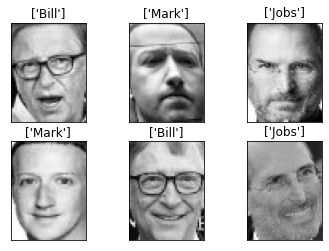

In [23]:
test_images = []
for file in os.listdir(base_dir + '/test_data/'):
    img = cv2.imread(base_dir + '/test_data/' + file, 0)
    test_images.append(img)

for i in range(0, len(test_images)):

    #test = cv2.imread(test_images[i], 0)
    test = np.array(test_images[i], dtype='float32')
    test = np.reshape(test, [1, test.shape[0]*test.shape[1]])
    test = pca.transform(test)

    pred = clf.predict(test)

    plt.subplot(2, 3, i+1)
    plt.imshow(test_images[i].reshape((62, 47)), cmap=plt.cm.gray)
    plt.title(pred)
    plt.xticks(())
    plt.yticks(())

